In [1]:
## Import essential libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
from datetime import datetime

pd.options.mode.chained_assignment = None  # default='warn'
%matplotlib notebook

In [2]:
## Import datatsets
stream_data = pd.read_csv('stream.csv')
chat_data = pd.read_csv('chat.csv')

In [3]:
## Convert time values to datetime object
stream_data.time = stream_data.apply(lambda row: datetime.strptime(row.time, '%Y-%m-%d %H:%M:%S'), axis=1)

## Bin time data
bins1 = []
for i in range(24):
    bins1.append(datetime.strptime('2015-01-01 ' +str(i)+':00:00', '%Y-%m-%d %H:%M:%S'))
bins1.append(datetime.strptime('2015-01-02 00:00:00', '%Y-%m-%d %H:%M:%S'))
labels1 = []
for i in range(0, 24):
    labels1.append(str(i))
stream_data['Hours'] = pd.cut(stream_data.time, bins=bins1, labels=labels1, ordered=True)

<IPython.core.display.Javascript object>


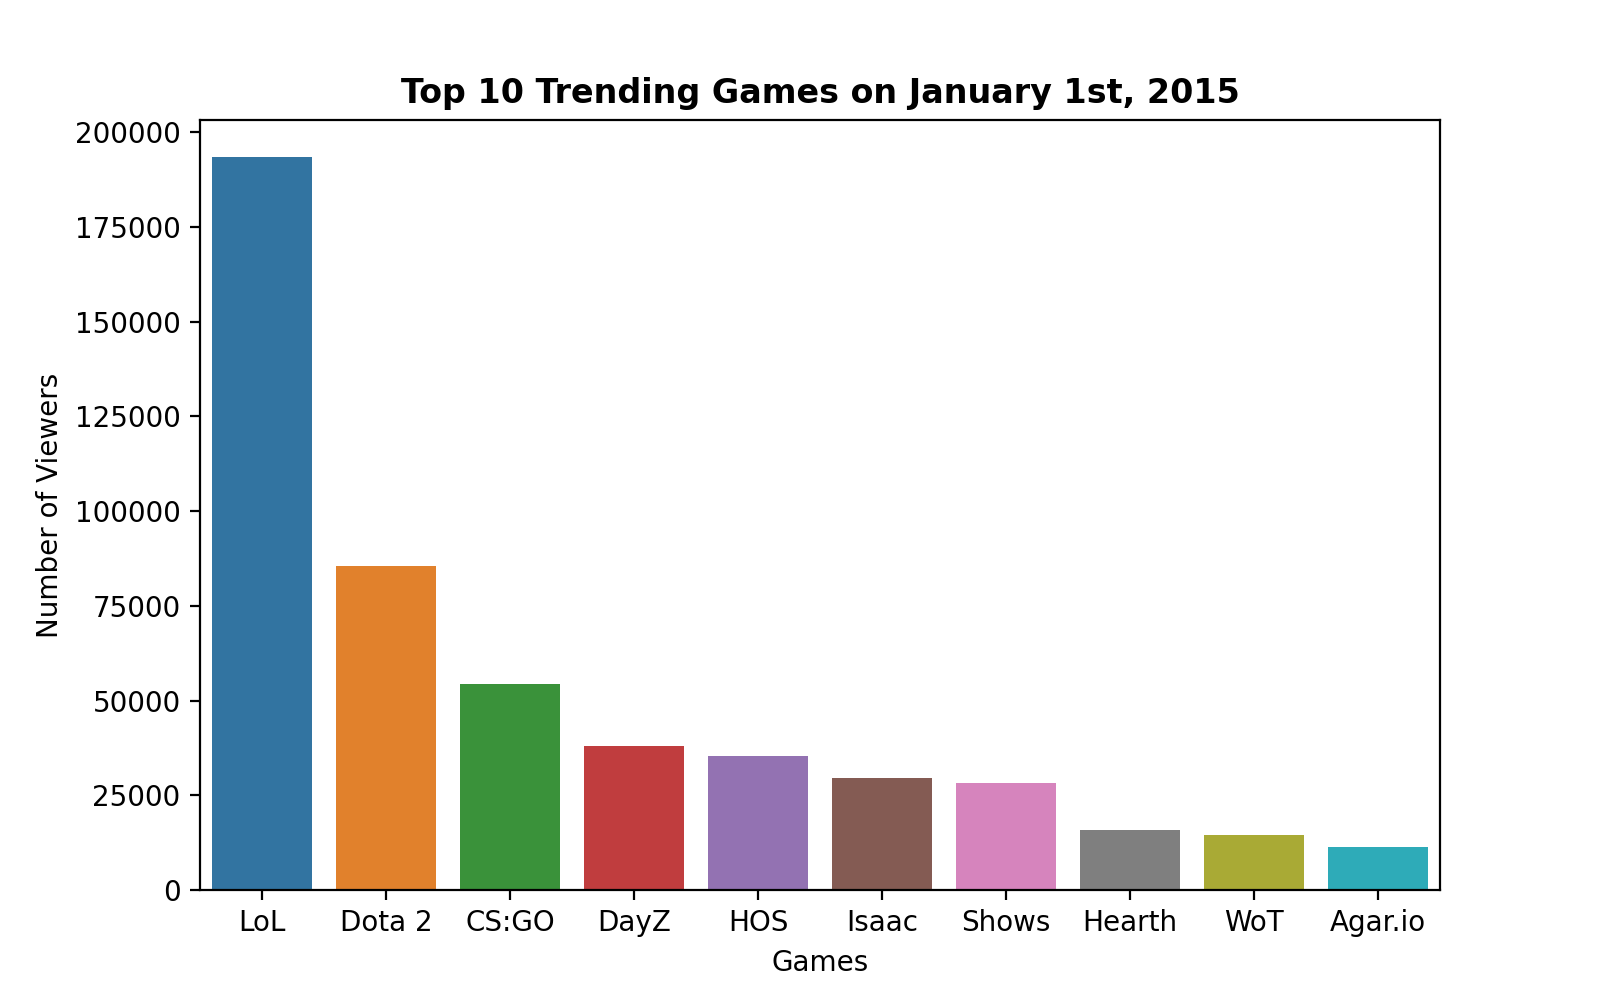

In [11]:
## Top 10 Games
viewer_game = stream_data.groupby(['game']).login.count().reset_index()
viewer_game = viewer_game.rename(columns={'login':'count'})
viewer_game = viewer_game.sort_values(by='count',ascending=False).reset_index()

top_10 = viewer_game.iloc[0:10]
# print(top_10)

## Plot a bar chart for top 10 games with highest viewers
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8,5), dpi=100)
sns.barplot(y=top_10['count'], x=top_10.game)
plt.title('Top 10 Trending Games on January 1st, 2015', weight='bold')
plt.xlabel('Games')
plt.ylabel('Number of Viewers')
ax.set_xticklabels(["LoL", "Dota 2", "CS:GO", "DayZ", "HOS", "Isaac", "Shows", "Hearth", "WoT", "Agar.io"])
plt.show()

<IPython.core.display.Javascript object>


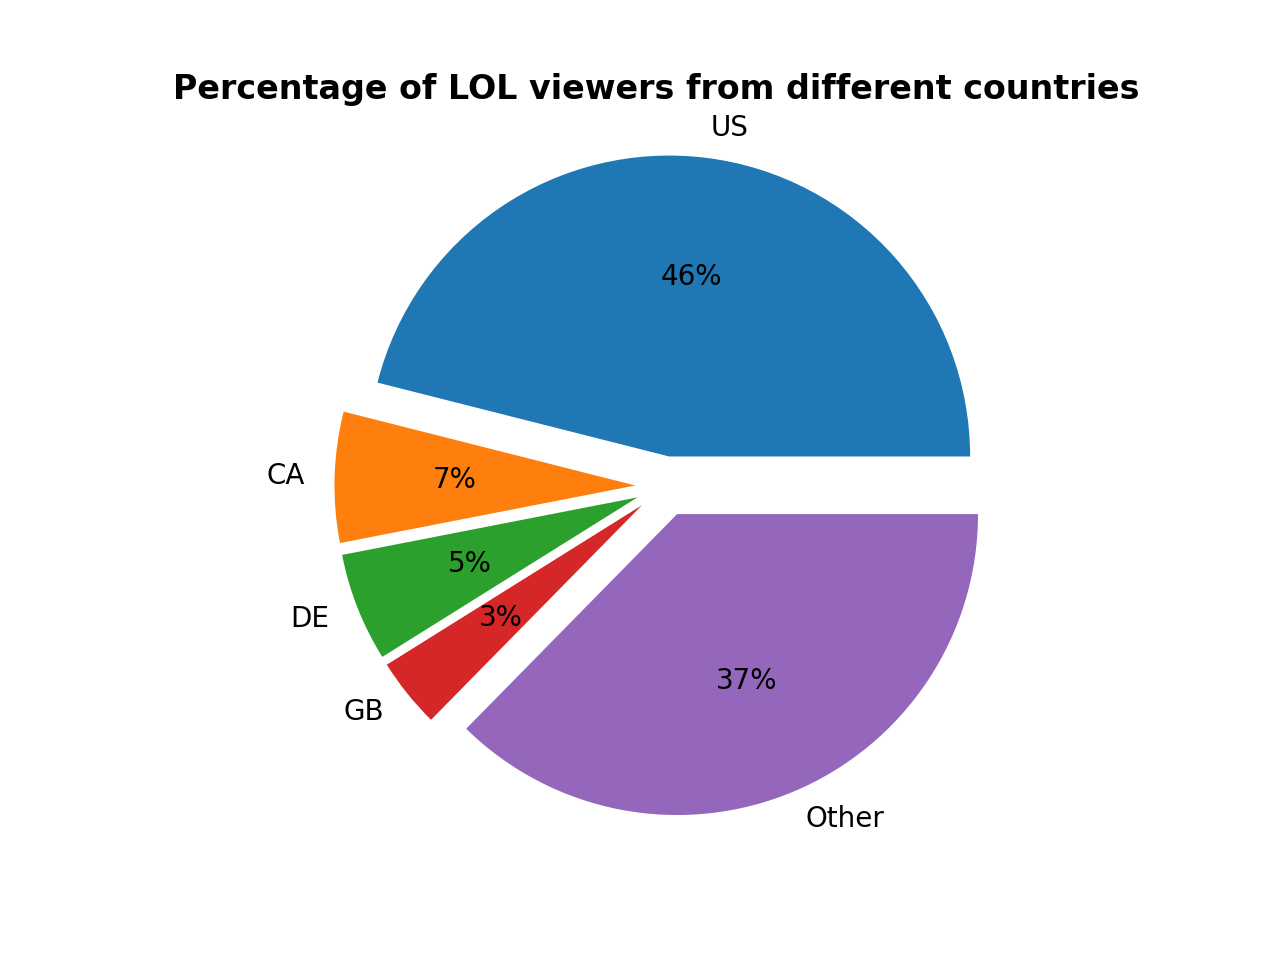

In [19]:
## LOL data
stream_data_lol = stream_data[(stream_data.game == 'League of Legends')]
temp_data = stream_data_lol.country.value_counts()

## Collapse categories
country_viewers = temp_data[temp_data >= 5000]
country_viewers['Other'] = temp_data[temp_data < 5000].sum()
country_viewers = country_viewers.reset_index()
country_viewers = country_viewers.rename(columns={'index':'country', 'country':'viewers'})

# Plot a pie chart
plt.close('all')
plt.pie(country_viewers.viewers, labels=country_viewers.country, normalize=True, autopct='%d%%', explode=[.1,.1,.1,.1,.1])
plt.title('Percentage of LOL viewers from different countries', weight='bold')
plt.axis('equal')
plt.show()
plt.savefig('percentageviewers.png')

<IPython.core.display.Javascript object>


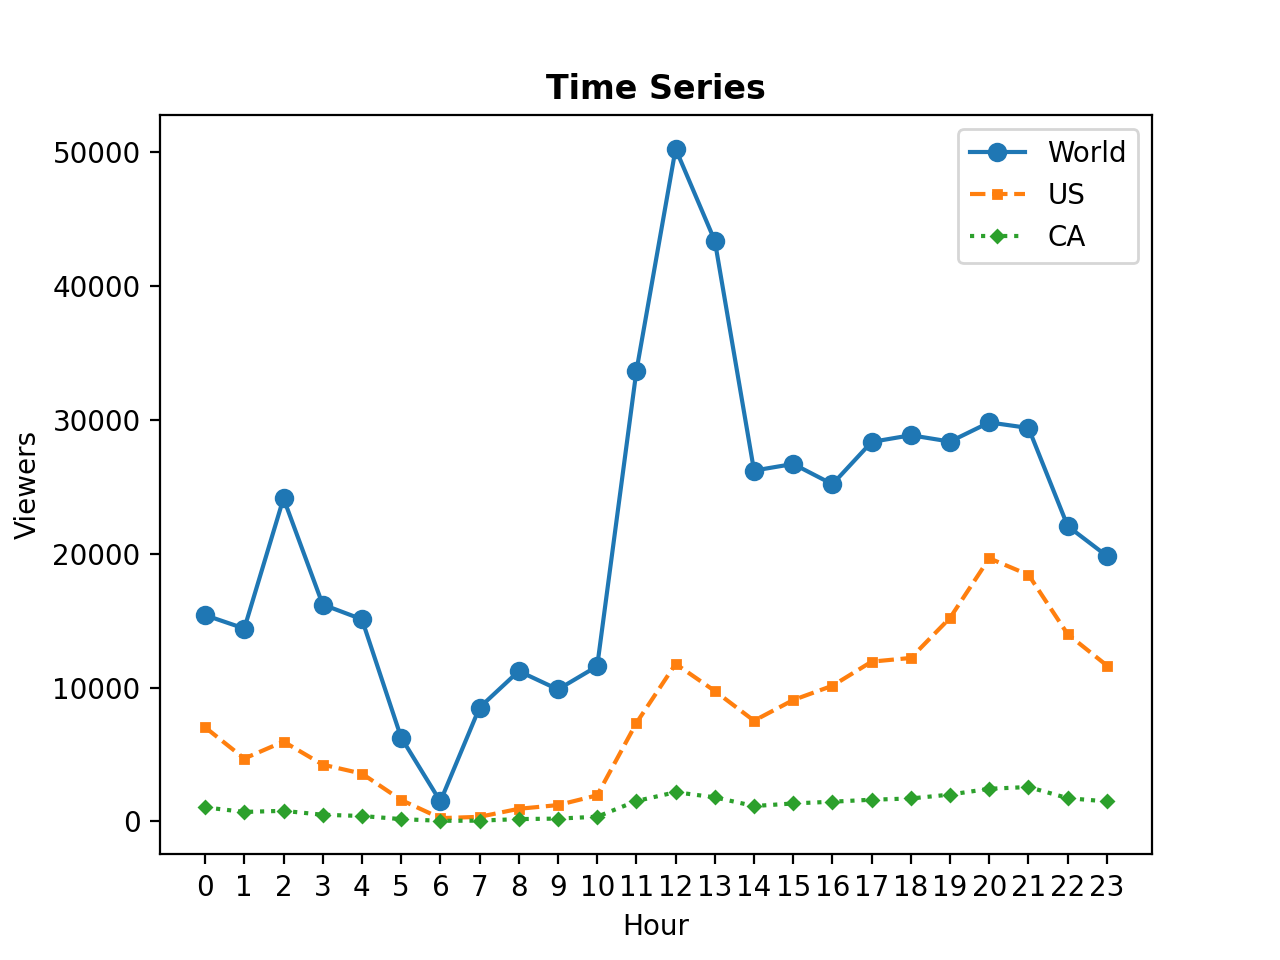

In [9]:
## World viewers by hours
world_viewers = stream_data.Hours.value_counts().reset_index()
world_viewers = world_viewers.rename(columns={'index':'Hours', 'Hours':'Viewers'})
world_viewers = world_viewers.sort_values(by='Hours')

## US viewers by hours
us_data = stream_data[stream_data.country == 'US']

us_viewers = us_data.Hours.value_counts().reset_index()
us_viewers = us_viewers.rename(columns={'index':'Hours', 'Hours':'Viewers'})
us_viewers = us_viewers.sort_values(by='Hours')

## CA viewers by hours
ca_data = stream_data[stream_data.country == 'CA']

ca_viewers = ca_data.Hours.value_counts().reset_index()
ca_viewers = ca_viewers.rename(columns={'index':'Hours', 'Hours':'Viewers'})
ca_viewers = ca_viewers.sort_values(by='Hours')

## Plot time serries line chart
plt.close('all')
plt.plot(world_viewers.Hours, world_viewers.Viewers, marker='o', label='World')
plt.plot(us_viewers.Hours, us_viewers.Viewers, marker='s', ms=3, linestyle='--', label='US')
plt.plot(ca_viewers.Hours, ca_viewers.Viewers, marker='D', ms=3, linestyle=':', label='CA')
plt.legend()
plt.title('Time Series', weight='bold')
plt.xlabel('Hour')
plt.ylabel('Viewers')
plt.show()
plt.savefig('Timeseries.png')

<IPython.core.display.Javascript object>


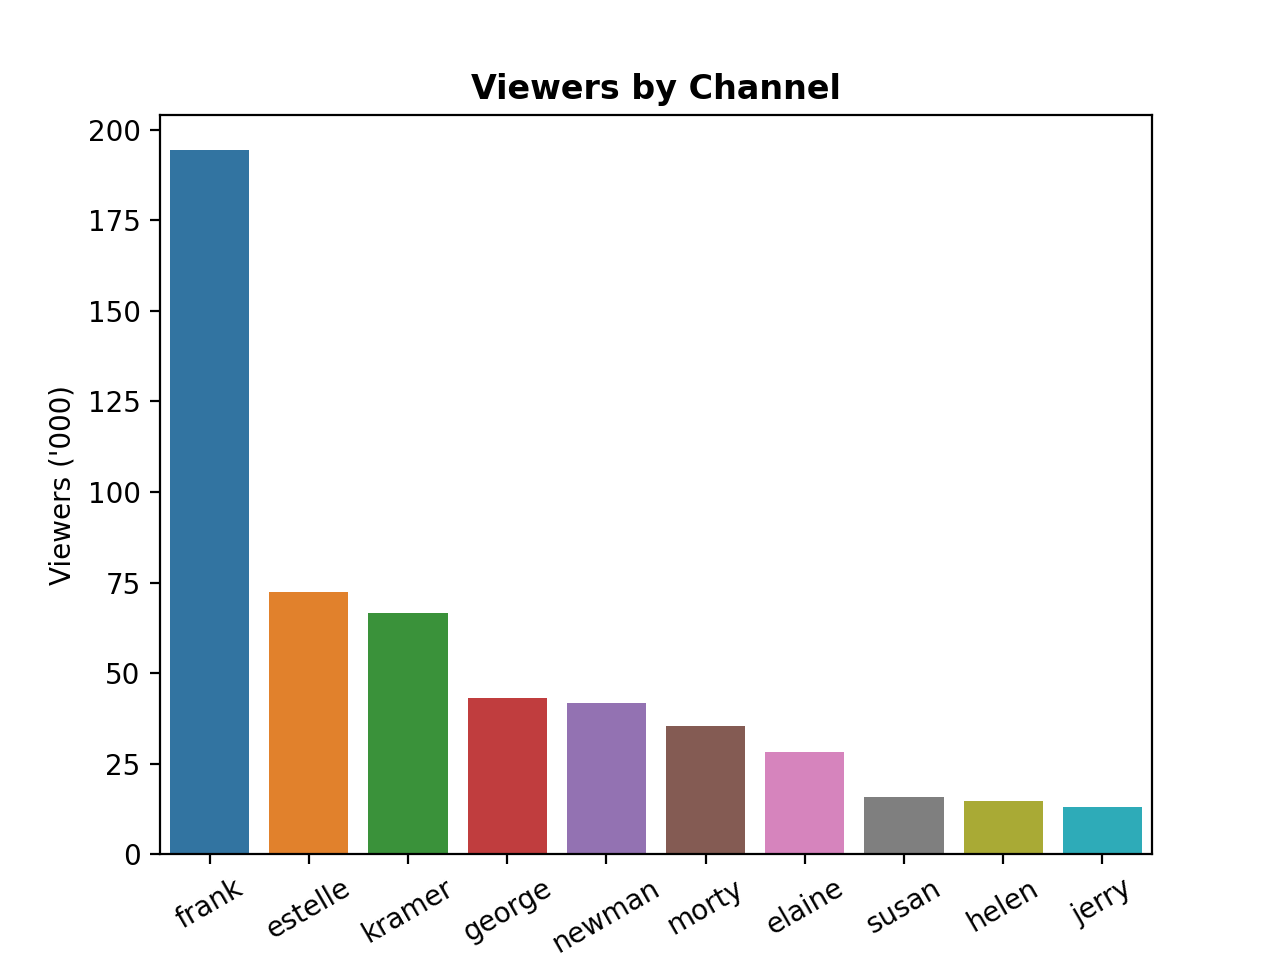

In [13]:
## Viewers by Channel
channel_viewer = stream_data.groupby('channel').device_id.count().reset_index()
channel_viewer = channel_viewer.rename(columns={'device_id':'viewers'})
channel_viewer = channel_viewer.sort_values(by='viewers', ascending=False)

plt.close('all')
ax = plt.subplot(1,1,1)
sns.barplot(x='channel', y='viewers', data=channel_viewer)
ax.set_xticklabels(labels=channel_viewer.channel, rotation=30)
ax.set_yticks([0, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000])
ax.set_yticklabels(['0', '25', '50', '75', '100', '125', '150', '175', '200'])
plt.xlabel('Channel')
plt.ylabel('Viewers (\'000)')
plt.title('Viewers by Channel', weight='bold')
plt.show()
plt.savefig('viewerchannel.png')